PROBLEM STATEMENT 

Using IRIS Data - Cluster Iris Flower into different Cluster based on similarity 

In [44]:
# Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [45]:
# Loading Data Points into Dataframe

data = pd.read_csv('Iris.csv')
data

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


In [46]:
data.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [47]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [48]:
data.shape

(150, 5)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [50]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [51]:
data.target.unique()

array([0, 1, 2], dtype=int64)

EXPLORATORY DATA ANALYSIS

<Axes: xlabel='petal_length', ylabel='petal_width'>

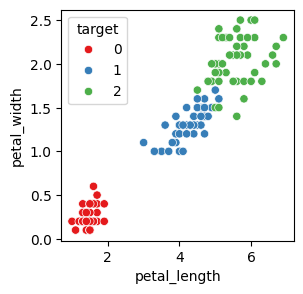

In [52]:
plt.figure(figsize=(3,3),facecolor='white')
sns.scatterplot(data=data,x='petal_length',y='petal_width',hue='target',palette='Set1')

DATA PROCESSING

In [53]:
data.duplicated().sum()

3

In [54]:
data.drop_duplicates(inplace = True)
data.shape

(147, 5)

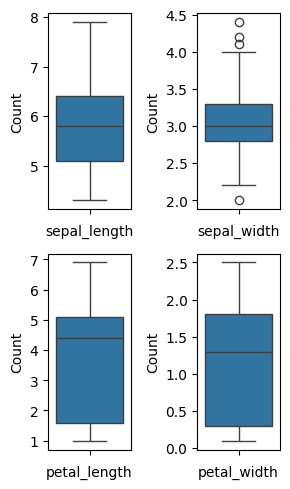

In [55]:
# Checking for the outliers

plt.figure(figsize=(3,5),facecolor='white')
plotnumber = 1

for column in data.drop('target',axis=1):
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
        plt.ylabel('Count')
    plotnumber +=1
plt.tight_layout()

<Axes: xlabel='sepal_width', ylabel='Count'>

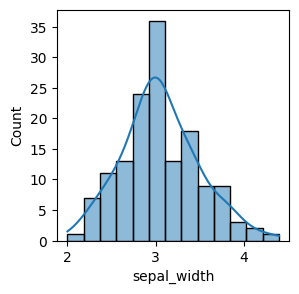

In [56]:
plt.figure(figsize=(3,3),facecolor='white')
sns.histplot(data=data,x='sepal_width',kde=True)

Replacing the Outliers by Mean or Median. 

3 -SIGMA RULE



In [57]:
# 3 SIGMA RULE BASE> 
low_limit = data['sepal_width'].mean()-3*data['sepal_width'].std()
upper_limit = data['sepal_width'].mean()+3*data['sepal_width'].std()
print(low_limit)
print(upper_limit)

1.7447561925148636
4.366808433335477


In [58]:
data.sepal_width.describe()

count    147.000000
mean       3.055782
std        0.437009
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

Some pointers are there which bypass the maximum pointers. 

In [59]:
# Hnndler outliers. 

# find values less than that of the lower limit

data.loc[data['sepal_width']<low_limit]

,sepal_length,sepal_width,petal_length,petal_width,target


In [60]:
# Find values which are greater tham the Upper llmit as per 3 Sigma rule

data.loc[data['sepal_width']>upper_limit]

,sepal_length,sepal_width,petal_length,petal_width,target
15,5.7,4.4,1.5,0.4,0


In [61]:
# Replace outliers with the mean value here 

data.loc[data['sepal_width']>upper_limit,'sepal_width']=data['sepal_width'].mean()

In [62]:
# Checkimg if the value of outliers is still there or not. 



data.loc[data['sepal_width']>upper_limit]

,sepal_length,sepal_width,petal_length,petal_width,target


<Axes: xlabel='sepal_width'>

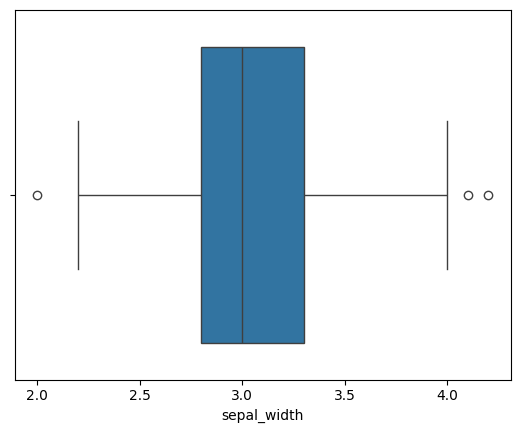

In [63]:
sns.boxplot(data = data ,x='sepal_width')

Since in Kmeans Clustering Method , its a distance based ML algorithm , we tend to use Scaler function to bring different features upto speed with standard scaler quantity. 

In [64]:
# Applying Scaler function. 
# Coverting to Standard Normal Distribution.

from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()

data[['sepal_length','sepal_width','petal_width','petal_length']]=scaling.fit_transform(data[['sepal_length','sepal_width','petal_width','petal_length']])

In [65]:
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.915509,1.076685,-1.357737,-1.335700,0
1,-1.157560,-0.110760,-1.357737,-1.335700,0
2,-1.399610,0.364218,-1.414778,-1.335700,0
3,-1.520635,0.126729,-1.300696,-1.335700,0
4,-1.036535,1.314174,-1.357737,-1.335700,0
...,...,...,...,...,...
145,1.020892,-0.110760,0.809831,1.444682,2
146,0.536792,-1.298205,0.695748,0.915085,2
147,0.778842,-0.110760,0.809831,1.047484,2
148,0.415766,0.839196,0.923913,1.444682,2


In [66]:
# Remove Target variable from the data set

X= data.drop('target',axis =1 )
X

,sepal_length,sepal_width,petal_length,petal_width
0,-0.915509,1.076685,-1.357737,-1.335700
1,-1.157560,-0.110760,-1.357737,-1.335700
2,-1.399610,0.364218,-1.414778,-1.335700
3,-1.520635,0.126729,-1.300696,-1.335700
4,-1.036535,1.314174,-1.357737,-1.335700
...,...,...,...,...
145,1.020892,-0.110760,0.809831,1.444682
146,0.536792,-1.298205,0.695748,0.915085
147,0.778842,-0.110760,0.809831,1.047484
148,0.415766,0.839196,0.923913,1.444682


Apply the KMeans Clustering  Model here. 

In [67]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,random_state =10)
model.fit(X)

KMeans(n_clusters=3, random_state=10)

In [68]:
# centroid - clusters centers
# n of clusters is same as the number of centroid. 

model.cluster_centers_

array([[ 1.13115918,  0.16894916,  0.98602459,  1.0180622 ],
       [-1.02392779,  0.84690331, -1.32208614, -1.26950045],
       [-0.03247461, -0.8935939 ,  0.35350052,  0.28005968]])

In [69]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2])

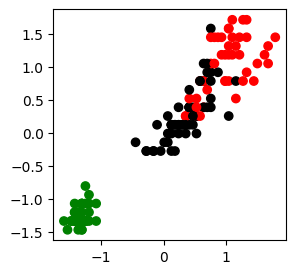

In [70]:
# Visualize the clusters created by the model

plt.figure(figsize=(3,3))
color_schema = np.array(['red','green','black'])
plt.scatter(X.petal_length,X.petal_width,color=color_schema[model.labels_])


ELBOW METHOD : TO FIND OPTIMAL VALUE OF K . 
We have to find the inertia value from 2 to 9 cluster value where each time we need to fit the value into the model and then get the proper value out of it. 

Text(0, 0.5, 'WCSS')

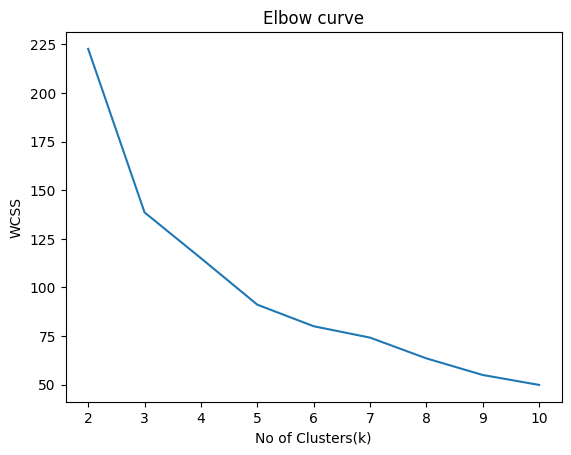

In [71]:


WCSS=[]

for i in range(2,11):
    model = KMeans(n_clusters=i,random_state = 10)
    model.fit(X)
    WCSS.append(model.inertia_)
plt.plot(range(2,11),WCSS)
plt.title("Elbow curve")
plt.xlabel('No of Clusters(k)')
plt.ylabel("WCSS")

In [72]:
WCSS

[222.71184296542322,
 138.57552918337572,
 115.02655173193644,
 91.11783978440099,
 80.0181038215794,
 74.15873054848204,
 63.479144067332484,
 54.93582016726477,
 49.82074993131043]

In [73]:
WCSS

[222.71184296542322,
 138.57552918337572,
 115.02655173193644,
 91.11783978440099,
 80.0181038215794,
 74.15873054848204,
 63.479144067332484,
 54.93582016726477,
 49.82074993131043]

EVALUATION MATRIX


The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

In [74]:
from sklearn.metrics import silhouette_score
# Silhouette Score

silhouette_score(X,model.labels_)

0.34143526098322363

In [82]:
plt.figure(figsize=(3,3))
color_schema = np.array(["red","green","blue"])
plt.scatter(X.petal_length,X.petal_width,color=color_schema[model.labels_])

IndexError: index 5 is out of bounds for axis 0 with size 3

<Figure size 300x300 with 0 Axes>